## 18. Nonideal MOS
### 18.1 Metal-Semiconductor workfunction difference

$\psi, \pi, \phi, \Phi, \epsilon, \varepsilon, \mathcal{E}$\
$\phi$ electrostatic potential inside the semiconductor component of an MOS device\
$\Phi_B$ surface potential-energy barrier height in an MS diode\
$\Phi_{B0}$   $\Phi_B$ barrier height when $\mathcal{E}=0$ at the MS interface \
$\phi_F$ reference voltage related to the semiconductor doping concentration\
$\Phi_M$ metal workfunction\
$\Phi_M' =\Phi_M - \chi_i$ effective metal workfunction in an MOS structure\
$\phi_{MS}$ metal-semiconductor workfunction difference expressed in volts\
$\phi_{ox}$ voltage inside the oxide\
$\Phi_S$ semiconductor workfunction\
$\phi_S$ semiconductor surface potential

#### Nonideal MOS 
$\chi$ semiconductor electron affinity\
$\chi' \quad $  $\chi'=\chi-\chi_i$ effective semiconductor electron affinity in an MOS structure\
$\chi_i $ insulator (oxide) electron affinity\
$\chi_{si}$ silicon electron affinity

$$\Phi_M \rightarrow \Phi_M - \chi_i = \Phi_M'$$
$$\chi \rightarrow \chi - \chi_i = \chi'$$
left side: metal side, right side: semiconductor side
$$\Phi_M' + q\Delta \phi_{ox}=(E_c - E_F)_{FB}-q\phi_s + \chi' $$
taking the metal to be the zero-potential reference point(the usual procedure in defining **built-in potentials**)
$$V_{bi}=-(\phi_s+\Delta \phi_{ox})=\phi_{MS} $$
$$\phi_{MS} \equiv \frac{1}{q}(\Phi_M-\Phi_S)=\frac{1}{q}[\Phi_M' - \chi' - (E_c - E_F)_{FB}] $$
$$\Delta V_G=(V_G-V_G')|same\ \phi_s\ or\ same\ C = \phi_{MS} $$
$V_G' :$ the voltage applied to the gate of the ideal device to achieve a given capacitance.
#### ideal MOS
$$\Phi_M=\Phi_S, \quad \Phi_S=\chi+(E_c-E_F)_{FB} $$

#### MS contact
$$\Phi_S=\chi+(E_C-E_F)_{FB}$$
$$\Phi_B=\Phi_M-\chi \quad ideal\ MS(n-type)\ contact$$
$$\Phi_B=E_G+\chi-\Phi_M \quad ideal\ MS(p-tpye)\ contact$$


#### Figure 18.3
$$\phi_{MS} \equiv \frac{1}{q}(\Phi_M-\Phi_S)=\frac{1}{q}[\Phi_M' - \chi' - (E_c - E_F)_{FB}] $$
$\Phi_M' - \chi'=$ -0.03eV for Al, -0.18eV for n+ poly, Eg=1.12eV for p+poly
$(E_c-E_F)_{FB}=(Ec-Ei)+(Ei-E_F)_{FB}=E_g/2-(Ei-E_F)_{FB}$\
$(E_c-E_F)_{FB}=Eg/2-(kT/q)ln(N_D/ni) - n-type\ crystalline\ Si$\
$(E_c-E_F)_{FB}=Eg/2+(kT/q)ln(N_A/ni) - p-type\ crystalline\ Si$\
$N_A=n_i e^{(E_i - E_F)_{FB}/kT}$

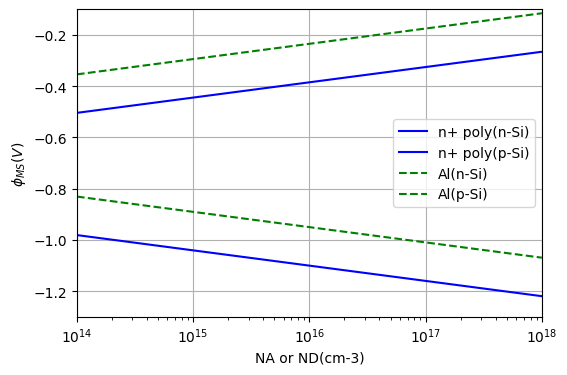

In [1]:
# Figure 18.3 workfunction difference n/p-type dopeant concentration in n+ poly sislicon gate and Al gate
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

T=300; ni=ni(T); Eg=Eg(T); kT=k*T
A=-0.18 # phi_M'-chi'=-0.18V for n+ poly silicon gate
#B=Eg # phi_M'-chi'=EgV for p+ poly silicon gate
C=-0.03 # phi_M'-chi'=-0.03V for Al gate

# Calculate M-S workfunction difference EcEF=(EC-EF)FB
NB=np.logspace(14,18,101)
EcEFn=Eg/2-kT*np.log(NB/ni)
EcEFp=Eg/2+kT*np.log(NB/ni)
phi_MSn=A-EcEFn; phi_MSp=A-EcEFp
#phi_MSnb=B-EcEFn; phi_MSpb=B-EcEFp
phi_MSnal=C-EcEFn; phi_MSpal=C-EcEFp

plt.figure(figsize=(6,4))
plt.semilogx(NB,phi_MSn, "b-", label="n+ poly(n-Si)")
plt.semilogx(NB,phi_MSp,"b-", label="n+ poly(p-Si)")
#plt.semilogx(NB,phi_MSnb,label="p+ poly(n-Si)")
#plt.semilogx(NB,phi_MSpb,,label="p+ poly(p-Si)" )
plt.semilogx(NB,phi_MSnal, "g--", label="Al(n-Si)")
plt.semilogx(NB,phi_MSpal, "g--", label="Al(p-Si)")

plt.xlim(1e14,1e18), plt.ylim(-1.3,-0.1), plt.xlabel("NA or ND(cm-3)"), plt.ylabel(r"$\phi_{MS}(V)$")
plt.legend(), plt.grid()
plt.show()

In [14]:
# Au gate, phi_M'-chi'-0.82eV
# (Ec-EF)_FB=phi_M'-chi'=0.82eV, p-Si MOS-C exhibiting a phi_MS=0
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

T=300; ni=ni(T); Eg=Eg(T); kT=k*T
EcEFp=0.82
EiEFp=EcEFp-Eg/2
NA=ni*np.exp(EiEFp/kT)
print('Ec-EF=%0.3feV, Ei-EF=%0.3feV, NA=%0.3ecm-3' % (EcEFp,EiEFp,NA))

Ec-EF=0.820eV, Ei-EF=0.258eV, NA=2.139e+14cm-3


### 18.2 Oxide charges
### 18.2.1 General Information
$$V_{bi}=-(\phi_S+\Delta \phi_{ox})=\phi_{MS}$$
$$V_G=\phi_S+\Delta \phi_{ox}$$
$$V_G=\phi_s+\frac{K_s}{K_o}x_o\mathcal{E}_S-\frac{1}{K_o \varepsilon_0}\int_0^{x_o}x \rho_{ox}(x)dx$$
$$V_G'=\phi_s+\frac{K_s}{K_o}x_o\mathcal{E}_S \quad ideal\ device$$

$$\Delta V_G(oxide\ charges)=(V_G-V_G')|same\ \phi_s = -\frac{1}{K_o \varepsilon_0}\int_0^{x_o}x \rho_{ox}(x)dx $$
$$\Delta V_G(mobile\ ions)=(V_G-V_G')|same\ \phi_s = -\frac{1}{K_o \varepsilon_0}\int_0^{x_o}x \rho_{ion}(x)dx $$
$$\Delta V_G(mobile\ ions\ after\ +BT)=(V_G-V_G')|same\ \phi_s = -\frac{1}{K_o \varepsilon_0}\int_0^{x_o}x Q_M \delta (x_o) dx=-\frac{x_o}{K_o \varepsilon_0}Q_M=-\frac{Q_M}{C_o} $$
$$\Delta V_G(mobile\ ions\ after\ -BT)=(V_G-V_G')|same\ \phi_s = -\frac{1}{K_o \varepsilon_0}\int_0^{x_o}x Q_M \delta (x_o) dx=0 $$
$\delta(x_o)$ : a delta-function positioned at the mobile ion in gate oxide
$$N=Q_M/q=-\frac{C_o}{q}[\Delta V_G(+BT)-\Delta V_G(-BT)] $$

In [12]:
# Exercise 18.2 mobile ions after -BT
# positive bias-temp make mobile ions move to the interface between oxide/silicon, negative bias to the interface btw poly and oxide.
# +BT 10V, -BT 0V
# Delta(+BT)-Delta(-BT)=-10V

from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt
T=300; ni=ni(T); Eg=Eg(T); kT=k*T; Ko=e_ox; xo=0.1e-4
DeltaVG=10
Co=Ko*e0/xo
N=-Co/q*DeltaVG
print("Co=%0.3eF, N=%0.3ecm-2" % (Co,N))


Co=3.453e-08F, N=-2.155e+12cm-2


### 18.2.3 The Fixed Charge
$\delta(x_o) :$ a delta-function positioned at the oxide-semiconductor interface \
$Q_F : $  the fixed oxide charge per unit area of the gate
$$\Delta V_G(fixed\ charge) = -\frac{Q_F}{C_o} $$

### 18.2.4 Interfacial Traps
$$\Delta V_G(interfacial\ traps) = -\frac{Q_{rr}(\phi_s)}{C_o} $$

### 18.2.5 Induced Charges
#### Radiation Effects
1. Electron-hole paris generated by ionizing radiation
2. Hopping transport of holes through localized states in SiO2 bulk
3. Deep hole trapping near Si-SiO2 interface
4. Radiation induced interface traps within Si bandgap

#### Negative Bias Instability
Typical stress conditions would be a negative gate bias sufficient to produce a field of 2MV/cm in the oxide and T > 250degree C\
The instability is characterized by a large negative shift along the voltage axis and a distortion of the MOS-C CV curve.\
Similar to ionizing radiation, the stress clearly causes an increase in the apparent fixed chage within the oxide and an increase in the interfacial-trap concentration.


### 18.2.6 $\Delta V_G$ Summary

$$\Delta V_G=(V_G-V_G')|same\ \phi_s = \phi_{MS} - \frac{Q_F}{C_o}-\frac{Q_M \gamma_M}{C_o} - \frac{Q_{rr}(\phi_s)}{C_o}$$
$$\gamma_M \equiv \frac{\int_0^{x_o} x\rho_{ion}(x)dx}{x_o\int_0^{x_o}\rho_{ion}(x)dx} $$
$\gamma_M :$ is a unitless quantity representing the centroid of the mobile ion chage in the oxide normalized to the width of the oxide layer\
$\gamma_M =0 :$ if the mobile ions are all at the metal(poly)-oxide inteface.\
$\gamma_M =1 :$ if the mobile ions are all piled up at the Si-SiO2 interface.\

$\gamma_M :$ 이온 전하들이 산화막 안에서 평균적으로 어디에 있는지를 나타내는 값입니다.\
분자는 ion의 무게중심 xo를 나타내고, 분모는 적분은 총 charge로 나누었고, xo로 나누어 단위를 없앴다.

Under flat-band conditions, $\phi_s=0$ and $V_G'=0.$ it therefore follows from V_FB
$$V_{FB}=V_G|_{\phi_s=0} = \phi_{MS} - \frac{Q_F}{C_o}-\frac{Q_M \gamma_M}{C_o} - \frac{Q_{rr}(\phi_s=0)}{C_o}$$

In [28]:
# Exercise 18.5 page 671
# Al-SiO2-p type Si MOS-C, 
# thermal oxidation in dry O2 at 1000C, N2 anneal
# QM/q=2e11/cm2, the structure is next phosphorus gettered so that an inadvertent alkali ion concentration
# Dit=2e10/cm2-eV of acceptor-like states is found to exist for all band gap enerties.
# T=300K xo=0.1um

from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import quad

T=300; ni=ni(T); Eg=Eg(T); kT=k*T; Ko=e_ox; xo=0.1e-4

NA=1e15; ND=1; NF_111=2e11; NM=2e11

Co=Ko*e0/xo
print("Co=%0.3eF" % Co)

phiMchi_nploy=-0.18 # phi_M'-chi'=-0.18V for n+ poly silicon gate
phiMchi_Al=-0.03 # phi_M'-chi'=-0.03V for Al gate
EcEFn=Eg/2-kT*np.log(ND/ni)
EcEFp=Eg/2+kT*np.log(NA/ni) 
phi_MSn=phiMchi_nploy-EcEFn; phi_MSp=phiMchi_nploy-EcEFp
phi_MSnal=phiMchi_Al-EcEFn; phi_MSpal=phiMchi_Al-EcEFp
#print(phi_MSpal)

NF_111=2e11
NF_100=NF_111/3
DVFix=q*NF_100/Co
#print(DVFix)

def gamma_M(rho_ion, a, b, num_points=1000):
    numerator, _ = quad(lambda x: x * rho_ion(x), a, b)
    denominator, _ = quad(rho_ion, a, b) # numerator에서 rho_ion(x)라는 함수를 정의하였음.
    
    if denominator == 0:
        return np.nan  # Avoid division by zero
    return numerator / (xo * denominator)

# Example: Define an example charge density function
def rho_ion(x):
    #return np.exp(-x)  # Example function for ion charge density
    return 1  # Example function for ion charge density

# Define oxide layer width
a=0
b=0.1*xo

gamma_value = gamma_M(rho_ion, 0, 0.1*xo)
print("gamma_M=%0.3f" % gamma_value)
DVMobile=q*NM*gamma_value/Co
#print(DVMobile)

# Qit(0)/Co, Acceptor-like centers are(-) charged if filled with an electron and neutral if empty. 
# under equilibrium conditions the interfacial traps are mostly filled below the Fermi level and mostly empty avobe the Fermi level.
# The filling and chage states under flat-band conditions are therefore as filled electron at states under Ef.
# Because Dit=constant, Qit(0)=-qDitDeltaE, where Delta E is the range of energies in the surface band gap containing negatively charged interfacial trps.
# Delta E=Ef-Ev=Eg/2-(Ei-Ef)=Eg/2-kT*ln(NA/ni)
# unit: Dit cm^-2*eV^-1, Co=F*cm^-2, Qit=q*int(Dit(E)*f(E)dE, a, b), dE=eV Qit=C/cm2, Co=F/cm2, V=Volts
Dit=2e10
DeltaE=Eg/2-kT*np.log(NA/ni)
print("DeltaE=%0.3feV" % DeltaE)
DQit=q*Dit*DeltaE/Co
#print(DQit)
VFB=phi_MSpal-DVFix-DVMobile-DQit
#print(VFB)
print("phi_MSpal=%0.3fV, DVFix=%0.3fV, DVMobile=%0.3fV, DQit=%0.3fV, VFB=%0.3fV" % (phi_MSpal, DVFix, DVMobile, DQit, VFB))


Co=3.453e-08F
gamma_M=0.050
DeltaE=0.265eV
phi_MSpal=-0.890V, DVFix=0.309V, DVMobile=0.046V, DQit=0.025V, VFB=-1.270V


### 18.3 MOSFET Threshold Considerations
### 18.3.1 VT Relationship
V_T': the threshold voltage of an ideal version of the given MOSFET, $\phi_s=2\phi_F$
$$V_T=V_T'+\phi_{MS} - \frac{Q_F}{C_o}-\frac{Q_M \gamma_M}{C_o} - \frac{Q_{rr}(\phi_s)}{C_o}$$
Under flate-band conditions $\phi_s=0,\ V_T'=0, V_G=0$
$$V_{FB}=V_G|_{\phi_s=0} = \phi_{MS} - \frac{Q_F}{C_o}-\frac{Q_M \gamma_M}{C_o} - \frac{Q_{rr}(\phi_s=0)}{C_o}$$
If $Q_rr$ changes little in going from $\phi_s=0$ to $\phi_s=2\phi_F$, a reasonably good approximation in well-made devices
$$V_T=V_T'+V_{FB} $$
$$V_T'=2\phi_F \pm \frac{Ks x_o}{Ko}\sqrt{\frac{4qN_B}{Ks\epsilon_0}(\pm \phi_F)} $$
(+) for n-channel devices, (-) for p-channel device, $N_B=N_A \ or\ N_D$ as appropriate

### 18.3.2 Threshold, Terminology, and Technology
### 18.3.3 Threshold Adjustment
a polysilicon instead of an Al gate
$$'\Phi_M'=\chi_{Si}+(E_c-E_F)_{poly-Si} $$
$$\phi_{MS}=\frac{1}{q}[(E_c-E_F)_{poly-Si}-(E_c-E_F)_{FB, crystalline-Si}] $$
#### ion implantation
$$\Delta V_G(implanted\ ion)=-\frac{Q_I}{C_o} $$

In [5]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import quad

T=300; ni=ni(T); Eg=Eg(T); kT=k*T; Ko=e_ox; xo=0.1e-4

NA=1e15; ND=1; NF_111=2e11; NM=2e11
Co=Ko*e0/xo
print("Co=%0.3eF" % Co)
NI=5e11
DVimplant=-q*NI/Co
print("DVimplant=%0.3eV" % DVimplant)

Co=3.453e-08F
DVimplant=-2.320e+00V


### 18.3.4 Back Biasing
### 18.3.5 Threshold Summary

In [9]:
# Problems 18.2 page 685, 
# polysilicon-gate MOS-C where EF-EC=0.2V in the heavily doped gate, Ef bigger than Ec
# EF-EC=-0.2V in the nondegenerately doped silicon sub
EcEFpoly=-0.2
EcEFfb=0.2
phiMS=EcEFpoly-EcEFfb
print(phiMS)

-0.4


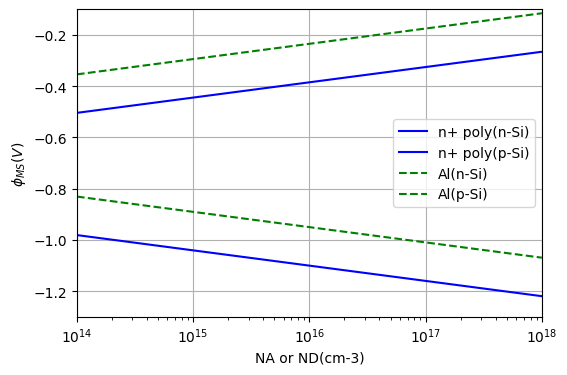

In [10]:
# Problem 18.3
# Figure 18.3 workfunction difference n/p-type dopeant concentration in n+ poly sislicon gate and Al gate
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

T=300; ni=ni(T); Eg=Eg(T); kT=k*T
A=-0.18 # phi_M'-chi'=-0.18V for n+ poly silicon gate
#B=Eg # phi_M'-chi'=EgV for p+ poly silicon gate
C=-0.03 # phi_M'-chi'=-0.03V for Al gate

# Calculate M-S workfunction difference EcEF=(EC-EF)FB
NB=np.logspace(14,18,101)
EcEFn=Eg/2-kT*np.log(NB/ni)
EcEFp=Eg/2+kT*np.log(NB/ni)
phi_MSn=A-EcEFn; phi_MSp=A-EcEFp
#phi_MSnb=B-EcEFn; phi_MSpb=B-EcEFp
phi_MSnal=C-EcEFn; phi_MSpal=C-EcEFp

plt.figure(figsize=(6,4))
plt.semilogx(NB,phi_MSn, "b-", label="n+ poly(n-Si)")
plt.semilogx(NB,phi_MSp,"b-", label="n+ poly(p-Si)")
#plt.semilogx(NB,phi_MSnb,label="p+ poly(n-Si)")
#plt.semilogx(NB,phi_MSpb,,label="p+ poly(p-Si)" )
plt.semilogx(NB,phi_MSnal, "g--", label="Al(n-Si)")
plt.semilogx(NB,phi_MSpal, "g--", label="Al(p-Si)")

plt.xlim(1e14,1e18), plt.ylim(-1.3,-0.1), plt.xlabel("NA or ND(cm-3)"), plt.ylabel(r"$\phi_{MS}(V)$")
plt.legend(), plt.grid()
plt.show()

In [30]:
# Problem 18.4 page 685
# rho_ion=1/cm3, Q_M=1/cm2

from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import quad

T=300; ni=ni(T); Eg=Eg(T); kT=k*T; Ko=e_ox; xo=0.1e-4

def total_ionic_charge(rho_ion, a, b, num_points=1000):
    return quad(lambda x: x * rho_ion(x), a, b)
def rho_ion(x):
    return 1e18  
a=0
b=xo
total_ionic = total_ionic_charge(rho_ion, 0, b)[0]
print("total_ionic=%0.3f" % total_ionic)
DVMobile=-q/(Ko*e0)*total_ionic
print(DVMobile)

rho=1e18
DVMobile2=-q*rho*xo**2/(Ko*e0)
print(DVMobile2)

total_ionic=50000000.000
-23.199125245842172
-46.39825049168434


Under flate-band conditions $\phi_s=0,\ V_T'=0, V_G=0$
$$V_{FB}=V_G|_{\phi_s=0} = \phi_{MS} - \frac{Q_F}{C_o}-\frac{Q_M \gamma_M}{C_o} - \frac{Q_{rr}(\phi_s=0)}{C_o} - \frac{Q_I}{C_o}$$
$$ = \phi_{MS} - q\frac{x_o}{K_o\varepsilon_0} \left[ \frac{Q_F}{q}+\frac{Q_M \gamma_M}{q} + \frac{Q_{rr}(\phi_s=0)}{q} + \frac{Q_I}{q}\right] $$ 

$$V_T=V_T'+V_{FB} $$
$$V_T'=2\phi_F \pm \frac{Ks x_o}{Ko}\sqrt{\frac{4qN_B}{Ks\epsilon_0}(\pm \phi_F)} $$
(+) for n-channel devices, (-) for p-channel device, $N_B=N_A \ or\ N_D$ as appropriate

In [40]:
# Problem 18.15 page 690
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

T=300; ni=ni(T); Eg=Eg(T); kT=k*T; Ko=e_ox; Ks=e_si; xo=0.05e-4
AG=1e-3; NB=1e15
phiMS=-0.46; QFoverq=2e11; QMoverq=0; Qitoverq=0; Qimpoverq=-4e11

VFB=phiMS-q*xo/(Ko*e0)*(QFoverq+QMoverq+Qitoverq+Qimpoverq)
phif=-kT*np.log(ND/ni)
VTprime=2*phif-Ks*xo/Ko*np.sqrt(4*q*NB/(Ks*e0)*(-phif))
VT=VTprime+VFB
print("VFB=%0.3fV, phif=%0.3fV, VTprime=%0.3fV, VT=%0.3fV" % (VFB,phif,VTprime,VT))

VFB=0.004V, phif=-0.298V, VTprime=-0.799V, VT=-0.795V


In [47]:
# Problem 18.16 page 690
# A-SiO2-Si MOSFET, VT targe=0.5V with channel implant
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

T=300; ni=ni(T); Eg=Eg(T); kT=k*T; Ko=e_ox; Ks=e_si; xo=0.01e-4
AG=1e-3; NA=1E17; VT=0.5
phiMS=-1.02; QFoverq=1e11; QMoverq=0; Qitoverq=0

phif=kT*np.log(NA/ni)
VTprime=2*phif+Ks*xo/Ko*np.sqrt(4*q*NA/(Ks*e0)*(phif))
NI=QFoverq+1/q*Ko*e0/xo*(VT-VTprime-phiMS)
print("VT=%0.3fV, phif=%0.3fV, VTprime=%0.3fV, NI=%0.3ecm-2" % (VT,phif,VTprime,NI))

VT=0.500V, phif=0.417V, VTprime=1.315V, NI=5.419e+11cm-2
